# Pengolahan Data

# Memuat Data

In [1]:
import os
import xarray as xr
import pandas as pd
import numpy as np
import gsw

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm

## Data Model

In [2]:
dir_mod = '/data/local/marine-training/data/MATPEL_05/cawo_out'
paths_mod = []
for file in os.listdir(dir_mod):
    if file.endswith('nc') and 'cawo' in file:
        paths_mod.append(os.path.join(dir_mod, file))
paths_mod.sort()
ds_mod = xr.open_mfdataset(paths_mod)
ds_mod

<xarray.Dataset> Size: 306GB
Dimensions:  (date: 419, depth: 23, lat: 1201, lon: 2201)
Coordinates:
  * date     (date) datetime64[ns] 3kB 2024-02-01 2024-02-02 ... 2025-03-31
  * depth    (depth) float32 92B 0.0 -5.0 -10.0 ... -1.2e+03 -1.5e+03 -2e+03
  * lat      (lat) float32 5kB -15.0 -14.98 -14.95 -14.93 ... 14.95 14.98 15.0
  * lon      (lon) float32 9kB 90.0 90.03 90.05 90.07 ... 144.9 145.0 145.0
Data variables:
    sw_dens  (date, depth, lat, lon) float32 102GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>
    sw_salt  (date, depth, lat, lon) float32 102GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>
    sw_temp  (date, depth, lat, lon) float32 102GB dask.array<chunksize=(5, 4, 241, 441), meta=np.ndarray>

## Data Argo Float

In [3]:
path_argo_nc = '/data/local/marine-training/data/MATPEL_05/argo_data/nc_argo/GL_PR_PF_2902800.nc'
ds_argo = xr.open_dataset(path_argo_nc)
ds_argo

<xarray.Dataset> Size: 2MB
Dimensions:                   (TIME: 220, LATITUDE: 220, LONGITUDE: 220,
                               POSITION: 220, DEPTH: 103)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2kB 2021-01-10T05:49:54 ....
  * LATITUDE                  (LATITUDE) float32 880B 4.381 4.046 ... 4.243
  * LONGITUDE                 (LONGITUDE) float32 880B 147.0 146.8 ... 130.8
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/23)
    TIME_QC                   (TIME) float32 880B ...
    POSITION_QC               (POSITION) float32 880B ...
    DC_REFERENCE              (TIME) object 2kB ...
    DIRECTION                 (TIME) object 2kB ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object 2kB ...
    PRES                      (TIME, DEPTH) float32 91kB ...
    ...                        ...
    PSAL                      (TIME, DEPTH) float64 181kB ...
    PSAL_QC                   (TIME, DEPTH) float32 91kB ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 181kB ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 91kB ...
    PSAL_ADJUSTED_DM          (TIME, DEPTH) object 181kB ...
    PSAL_ADJUSTED_ERROR       (TIME, DEPTH) float64 181kB ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  2902800
    institution:                    First Institute of Oceanography - Ministr...
    institution_edmo_code:          4640
    site_code:                       
    ...                             ...
    last_date_observation:          2025-04-05T01:30:25Z
    last_latitude_observation:      4.24300
    last_longitude_observation:     130.82900
    date_update:                    2025-04-15T09:50:18Z
    history:                        2025-04-15T09:50:18Z : Creation
    data_mode:                      M

## Data Sea Surface Drifter

In [4]:
# Load into dataframe
path_drifter_csv = '/data/local/marine-training/data/MATPEL_05/drifter_data/drifter_6hour_qc_f5dd_5de7_fd9d.csv'
df_drifter = pd.read_csv(path_drifter_csv)

# Display basic info and the first few rows
df_drifter

,ID,WMO,time,latitude,longitude,sst,err_sst,ve,vn,err_lat,...,deploy_lon,start_date,start_lat,start_lon,end_date,end_lat,end_lon,drogue_lost_date,DrogueType,DrogueLength
0,NaN,NaN,UTC,degrees_north,degrees_east,degree_C,degree_C,NaN,NaN,NaN,...,degrees_east,UTC,degrees_north,degrees_east,UTC,degrees_north,degrees_east,UTC,NaN,NaN
1,3.002340e+14,5102836.0,2024-02-01T00:00:00Z,11.293,131.199,28.159,0.041,-0.70395,0.12636,0.001,...,-154.965,2022-09-28T00:00:00Z,3.0,-154.98,2024-02-18T00:00:00Z,8.95,126.31,2023-01-03T00:00:00Z,NaN,6.6 m
2,3.002340e+14,5102836.0,2024-02-01T06:00:00Z,11.315,131.057,28.178,0.041,-0.67358,0.19455,0.001,...,-154.965,2022-09-28T00:00:00Z,3.0,-154.98,2024-02-18T00:00:00Z,8.95,126.31,2023-01-03T00:00:00Z,NaN,6.6 m
3,3.002340e+14,5102836.0,2024-02-01T12:00:00Z,11.369,130.932,28.082,0.041,-0.57381,0.30063,0.001,...,-154.965,2022-09-28T00:00:00Z,3.0,-154.98,2024-02-18T00:00:00Z,8.95,126.31,2023-01-03T00:00:00Z,NaN,6.6 m
4,3.002340e+14,5102836.0,2024-02-01T18:00:00Z,11.432,130.83,28.007,0.041,-0.53084,0.22220,0.001,...,-154.965,2022-09-28T00:00:00Z,3.0,-154.98,2024-02-18T00:00:00Z,8.95,126.31,2023-01-03T00:00:00Z,NaN,6.6 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,3.005341e+14,4804107.0,2024-04-13T06:00:00Z,-4.143,90.235,29.973,0.065,-0.29942,-0.16107,0.015,...,77.38,2024-01-16T00:00:00Z,-7.92,77.38,NaN,NaN,NaN,NaN,NaN,7.5 m
6013,3.005341e+14,4804107.0,2024-04-13T12:00:00Z,-4.168,90.174,29.973,0.062,-0.26649,-0.05737,0.002,...,77.38,2024-01-16T00:00:00Z,-7.92,77.38,NaN,NaN,NaN,NaN,NaN,7.5 m
6014,3.005341e+14,4804107.0,2024-04-13T18:00:00Z,-4.165,90.131,29.931,0.065,-0.22199,0.03832,0.015,...,77.38,2024-01-16T00:00:00Z,-7.92,77.38,NaN,NaN,NaN,NaN,NaN,7.5 m
6015,3.005341e+14,4804107.0,2024-04-14T00:00:00Z,-4.153,90.087,29.887,0.062,-0.31198,0.07767,0.002,...,77.38,2024-01-16T00:00:00Z,-7.92,77.38,NaN,NaN,NaN,NaN,NaN,7.5 m


# Data Filtering

## Argo Data

### Membuat kriteria seleksi

In [5]:
# Menyeleksi berdasarkan QC. QC Baik -> flag: 1
ds_argo_filtered = (ds_argo
                    .where(ds_argo['PRES_ADJUSTED_QC'] == 1)
                    .where(ds_argo['TEMP_ADJUSTED_QC'] == 1))

In [6]:
# Menyeleksi berdasarkan waktu (disesuaikan dengan ketersediaan data model untuk keperluan verifikasi)
# serta berada di wilayah domain model

t_start = pd.to_datetime("2024-02-01")
t_end = pd.to_datetime("2025-04-01")
ext_indo = [90, 145, -15, 15]

# 1. Mengambil nilai dari dimensi
lat = ds_argo_filtered['LATITUDE'].values
lon = ds_argo_filtered['LONGITUDE'].values
tm = pd.to_datetime(ds_argo_filtered['TIME'].values)

# 2. Buat mask lokasi: hanya posisi dalam batas wilayah Indonesia
mask_pos = (lon >= ext_indo[0]) & (lon <= ext_indo[1]) & (lat >= ext_indo[2]) & (lat <= ext_indo[3])

# 3. Buat mask waktu: hanya waktu dalam rentang yang ditentukan
mask_tm = (tm >= t_start) & (tm <= t_end)

# 4. Gabungkan kedua mask (lokasi dan waktu)
mask_combined = mask_pos & mask_tm

# 5. Indeks data yang lolos seleksi
valid_indices = np.where(mask_combined)[0]
print(f"Indeks/cycle yang lolos seleksi: {valid_indices}")

Indeks/cycle yang lolos seleksi: [159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176
 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218]


### Mengambil irisan data sesuai dengan kriteria seleksi

In [7]:
ds_argo_filtered = ds_argo_filtered.sel(TIME=mask_combined, LATITUDE=mask_combined, LONGITUDE=mask_combined, POSITION=valid_indices)
ds_argo_filtered['POSITION'] = ('TIME', ds_argo['POSITION'].values[valid_indices])
ds_argo_filtered

<xarray.Dataset> Size: 2MB
Dimensions:                   (TIME: 60, DEPTH: 103, POSITION: 60,
                               LATITUDE: 60, LONGITUDE: 60)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 480B 2024-02-05T01:30:26 ...
  * LATITUDE                  (LATITUDE) float32 240B 4.764 4.568 ... 4.038
  * LONGITUDE                 (LONGITUDE) float32 240B 130.1 129.8 ... 131.1
    POSITION                  (TIME) int64 480B 159 160 161 162 ... 216 217 218
Dimensions without coordinates: DEPTH
Data variables: (12/23)
    TIME_QC                   (TIME, DEPTH) float32 25kB 1.0 1.0 1.0 ... nan nan
    POSITION_QC               (POSITION, TIME, DEPTH) float32 1MB 1.0 ... nan
    DC_REFERENCE              (TIME, DEPTH) object 49kB b'93359759' ... nan
    DIRECTION                 (TIME, DEPTH) object 49kB b'A' b'A' ... nan nan
    VERTICAL_SAMPLING_SCHEME  (TIME, DEPTH) object 49kB b'Synthetic sampling'...
    PRES                      (TIME, DEPTH) float32 25kB 0.0 0.6 1.9 ... nan nan
    ...                        ...
    PSAL                      (TIME, DEPTH) float64 49kB 34.02 34.06 ... nan nan
    PSAL_QC                   (TIME, DEPTH) float32 25kB 1.0 1.0 1.0 ... nan nan
    PSAL_ADJUSTED             (TIME, DEPTH) float64 49kB 34.02 34.06 ... nan nan
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 25kB 1.0 1.0 1.0 ... nan nan
    PSAL_ADJUSTED_DM          (TIME, DEPTH) object 49kB b'D' b'D' ... nan nan
    PSAL_ADJUSTED_ERROR       (TIME, DEPTH) float64 49kB 0.009 0.009 ... nan nan
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  2902800
    institution:                    First Institute of Oceanography - Ministr...
    institution_edmo_code:          4640
    site_code:                       
    ...                             ...
    last_date_observation:          2025-04-05T01:30:25Z
    last_latitude_observation:      4.24300
    last_longitude_observation:     130.82900
    date_update:                    2025-04-15T09:50:18Z
    history:                        2025-04-15T09:50:18Z : Creation
    data_mode:                      M

## Ocean Surface Drifter Data

In [8]:
# Data sudah terseleksi saat akuisisi, hanya perlu menyesuaikan format data dan merapihkan data tabel
# Ambil baris pertama sebagai header yang benar
new_header = np.asarray(df_drifter.columns)
df_drifter_adjs = df_drifter[1:]
df_drifter_adjs.columns = new_header

# Drop rows dengan ID, latitude, atau longitude kosong
df_drifter_adjs = df_drifter_adjs.dropna(subset=["ID", "latitude", "longitude"])

# Konversi tipe data yang diperlukan
df_drifter_adjs["ID"] = df_drifter_adjs["ID"].astype(int)
df_drifter_adjs["latitude"] = df_drifter_adjs["latitude"].astype(float)
df_drifter_adjs["longitude"] = df_drifter_adjs["longitude"].astype(float)
df_drifter_adjs["time"] = pd.to_datetime(df_drifter_adjs["time"], format="%Y-%m-%dT%H:%M:%SZ")
df_drifter_adjs["start_date"] = pd.to_datetime(df_drifter_adjs["start_date"], format="%Y-%m-%dT%H:%M:%SZ")
df_drifter_adjs["deploy_date"] = pd.to_datetime(df_drifter_adjs["deploy_date"], format="%Y-%m-%dT%H:%M:%SZ")
df_drifter_adjs["end_date"] = pd.to_datetime(df_drifter_adjs["end_date"], format="%Y-%m-%dT%H:%M:%SZ")
df_drifter_adjs["drogue_lost_date"] = pd.to_datetime(df_drifter_adjs["drogue_lost_date"], format="%Y-%m-%dT%H:%M:%SZ")

# Ambil ID unik
unique_ids = df_drifter_adjs["ID"].unique()

# Tampilkan jumlah dan sampel ID
len(unique_ids), [int(i) for i in unique_ids[:5]]


(37,
 [300234010820530,
  300234010827560,
  300234010828550,
  300234010829560,
  300234060253330])

In [9]:
# Menampilkan data drifter yang sudah disesuaikan
df_drifter_adjs

,ID,WMO,time,latitude,longitude,sst,err_sst,ve,vn,err_lat,...,deploy_lon,start_date,start_lat,start_lon,end_date,end_lat,end_lon,drogue_lost_date,DrogueType,DrogueLength
1,300234010820530,5102836.0,2024-02-01 00:00:00,11.293,131.199,28.159,0.041,-0.70395,0.12636,0.001,...,-154.965,2022-09-28,3.0,-154.98,2024-02-18,8.95,126.31,2023-01-03,NaN,6.6 m
2,300234010820530,5102836.0,2024-02-01 06:00:00,11.315,131.057,28.178,0.041,-0.67358,0.19455,0.001,...,-154.965,2022-09-28,3.0,-154.98,2024-02-18,8.95,126.31,2023-01-03,NaN,6.6 m
3,300234010820530,5102836.0,2024-02-01 12:00:00,11.369,130.932,28.082,0.041,-0.57381,0.30063,0.001,...,-154.965,2022-09-28,3.0,-154.98,2024-02-18,8.95,126.31,2023-01-03,NaN,6.6 m
4,300234010820530,5102836.0,2024-02-01 18:00:00,11.432,130.830,28.007,0.041,-0.53084,0.22220,0.001,...,-154.965,2022-09-28,3.0,-154.98,2024-02-18,8.95,126.31,2023-01-03,NaN,6.6 m
5,300234010820530,5102836.0,2024-02-02 00:00:00,11.455,130.722,27.968,0.041,-0.54977,-0.01695,0.001,...,-154.965,2022-09-28,3.0,-154.98,2024-02-18,8.95,126.31,2023-01-03,NaN,6.6 m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6012,300534064403780,4804107.0,2024-04-13 06:00:00,-4.143,90.235,29.973,0.065,-0.29942,-0.16107,0.015,...,77.38,2024-01-16,-7.92,77.38,NaT,NaN,NaN,NaT,NaN,7.5 m
6013,300534064403780,4804107.0,2024-04-13 12:00:00,-4.168,90.174,29.973,0.062,-0.26649,-0.05737,0.002,...,77.38,2024-01-16,-7.92,77.38,NaT,NaN,NaN,NaT,NaN,7.5 m
6014,300534064403780,4804107.0,2024-04-13 18:00:00,-4.165,90.131,29.931,0.065,-0.22199,0.03832,0.015,...,77.38,2024-01-16,-7.92,77.38,NaT,NaN,NaN,NaT,NaN,7.5 m
6015,300534064403780,4804107.0,2024-04-14 00:00:00,-4.153,90.087,29.887,0.062,-0.31198,0.07767,0.002,...,77.38,2024-01-16,-7.92,77.38,NaT,NaN,NaN,NaT,NaN,7.5 m


# Visualisasi Data

## Membuat diagram Hovmoller dari data argo

### Menggunakan sea water pressure sebagai layer kedalaman

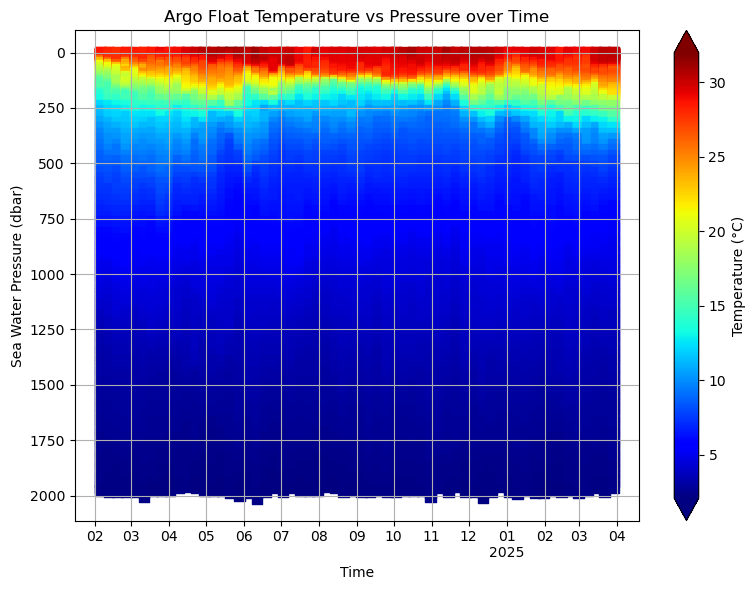

In [10]:
# Ambil variabel penting
time = ds_argo_filtered['TIME'].values              # shape: (TIME,)
press = ds_argo_filtered['PRES_ADJUSTED'].values    # shape: (TIME, DEPTH)
temp = ds_argo_filtered['TEMP_ADJUSTED'].values     # shape: (TIME, DEPTH)

# Ulangi time sebanyak jumlah depth (103)
n_time, n_depth = press.shape
time_2d = np.repeat(time[:, np.newaxis], n_depth, axis=1)  # shape: (TIME, DEPTH)

# Flatten semua
time_flat = time_2d.flatten()
press_flat = press.flatten()
temp_flat = temp.flatten()

# Hapus NaN (masking)
valid = ~np.isnan(press_flat) & ~np.isnan(temp_flat)
time_flat = time_flat[valid]
press_flat = press_flat[valid]
temp_flat = temp_flat[valid]

# Flatten time
time_flat_datetime = np.array([pd.to_datetime(t).to_pydatetime() for t in time_flat])

# Plot
fig, ax = plt.subplots(figsize=(8, 8/(4/3)))
sc = ax.scatter(time_flat_datetime, press_flat, c=temp_flat, cmap='jet', s=60, marker='s')
ax.invert_yaxis()
plt.colorbar(sc, label="Temperature (°C)", extend='both')
ax.set_xlabel("Time")
ax.set_ylabel("Sea Water Pressure (dbar)")
ax.set_title("Argo Float Temperature vs Pressure over Time")
ax.grid(True)

# Set ticks setiap bulan
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Custom formatter: tampilkan bulan, dan tahun jika Januari
def custom_date_formatter(x, pos):
    dt = mdates.num2date(x)
    if dt.month == 1:
        return f"{dt:%m}\n{dt.year}"
    else:
        return f"{dt:%m}"

ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_date_formatter))

# Rotasi agar rapi
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

### Menggunakan sea depth sebagai layer kedalaman

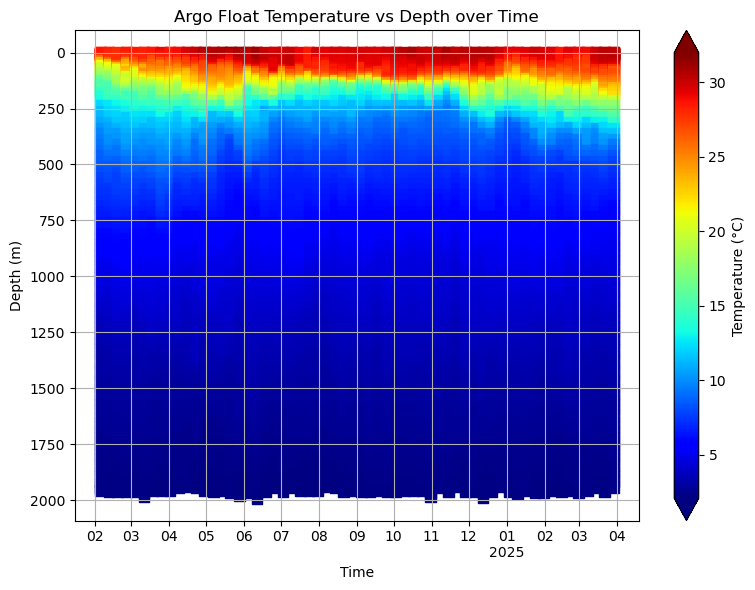

In [11]:
# Ekstrak variabel yang dibutuhkan dari dataset
time = ds_argo_filtered["TIME"].values                            # shape: (TIME,)
press = ds_argo_filtered["PRES_ADJUSTED"].values                  # shape: (TIME, DEPTH)
temp = ds_argo_filtered["TEMP_ADJUSTED"].values                   # shape: (TIME, DEPTH)
latitude = ds_argo_filtered["LATITUDE"].values                    # shape: (TIME,)

# Konversi tekanan ke kedalaman (dalam meter) menggunakan lintang sesuai TIME
depth = -gsw.z_from_p(press, latitude[:, np.newaxis])  # shape: (TIME, DEPTH)

# Buat time array 2D agar bisa di-flatten bareng dengan variabel lainnya
n_time, n_depth = press.shape
time_2d = np.repeat(time[:, np.newaxis], n_depth, axis=1)  # shape: (TIME, DEPTH)

# Flatten semua array
time_flat = time_2d.flatten()
depth_flat = depth.flatten()
temp_flat = temp.flatten()

# Masking untuk menghapus nilai NaN
valid = ~np.isnan(depth_flat) & ~np.isnan(temp_flat)
time_flat = time_flat[valid]
depth_flat = depth_flat[valid]
temp_flat = temp_flat[valid]

# Konversi waktu ke datetime untuk plotting
time_flat_datetime = np.array([pd.to_datetime(t).to_pydatetime() for t in time_flat])

# Plot Hovmöller diagram (Time vs Depth, colored by Temperature)
fig, ax = plt.subplots(figsize=(8, 8/(4/3)))
sc = ax.scatter(time_flat_datetime, depth_flat, c=temp_flat, cmap='jet', s=60, marker='s')
ax.invert_yaxis()
plt.colorbar(sc, label="Temperature (°C)", extend='both')
ax.set_xlabel("Time")
ax.set_ylabel("Depth (m)")
ax.set_title("Argo Float Temperature vs Depth over Time")
ax.grid(True)

# Format sumbu X agar tampil bulanan
ax.xaxis.set_major_locator(mdates.MonthLocator())

# Custom formatter untuk sumbu X
def custom_date_formatter(x, pos):
    dt = mdates.num2date(x)
    if dt.month == 1:
        return f"{dt:%m}\n{dt.year}"
    else:
        return f"{dt:%m}"

ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_date_formatter))
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

plt.tight_layout()
plt.show()

### Plot data model

#### Esktraksi data dan membuat dataframe

In [12]:
# Ekstrak Data model berdasarkan lat/lon/time data obs
argo_lats = ds_argo_filtered['LATITUDE'].values
argo_lons = ds_argo_filtered['LONGITUDE'].values
argo_time = pd.to_datetime(ds_argo_filtered['TIME'].values)

mod_temps_val = []

for i, dt in enumerate(argo_time):
    argLat = argo_lats[i]
    argLon = argo_lons[i]
    ds0 = ds_mod.sel(date=dt, lat=argLat, lon=argLon, method='nearest')
    mod_temps_val.append(ds0['sw_temp'].values)
    
# Buat dataframe untuk suhu pada kedalaman target dari data model
df_mod_temp = pd.DataFrame(mod_temps_val, columns=np.abs(ds_mod.depth.values))
df_mod_temp['TIME'] = argo_time
df_mod_temp.set_index('TIME', inplace=True)
df_mod_temp = df_mod_temp.transpose()
df_mod_temp.index.name = 'Depth (m)'
df_mod_temp.columns.name = 'Time'
df_mod_temp

Time,2024-02-05 01:30:26,2024-02-12 03:32:03,2024-02-19 05:37:58,2024-02-26 07:32:30,2024-03-04 09:43:25,2024-03-11 11:30:04,2024-03-18 13:36:50,2024-03-25 15:43:17,2024-04-01 17:40:01,2024-04-08 19:31:25,...,2025-01-24 05:39:25,2025-01-31 07:36:29,2025-02-07 09:33:01,2025-02-14 11:25:19,2025-02-21 13:41:19,2025-02-28 15:38:13,2025-03-07 17:31:14,2025-03-14 19:44:01,2025-03-21 21:36:20,2025-03-28 23:30:57
Depth (m),,,,,,,,,,,,,,,,,,,,,
0.0,27.828125,28.125000,28.101562,28.203125,28.328125,27.976562,28.187500,28.132812,28.195312,28.851562,...,29.820312,29.718750,29.125000,28.789062,29.078125,29.328125,29.687500,30.429688,30.601562,30.531250
5.0,27.812500,28.117188,28.070312,28.187500,28.296875,27.953125,28.140625,28.031250,28.164062,28.812500,...,29.796875,29.710938,29.031250,28.750000,29.070312,29.273438,29.671875,30.375000,30.437500,30.539062
10.0,27.789062,28.093750,28.031250,28.156250,28.250000,27.929688,28.093750,27.898438,28.101562,28.742188,...,29.773438,29.703125,28.960938,28.718750,29.054688,29.234375,29.648438,30.335938,30.359375,30.539062
15.0,27.773438,28.062500,28.007812,28.125000,28.203125,27.906250,28.062500,27.781250,28.031250,28.671875,...,29.757812,29.703125,28.945312,28.703125,29.031250,29.210938,29.640625,30.320312,30.335938,30.531250
20.0,27.765625,27.968750,27.992188,28.046875,28.125000,27.875000,28.046875,27.703125,27.929688,28.523438,...,29.765625,29.671875,28.929688,28.703125,29.000000,29.203125,29.625000,30.312500,30.328125,30.531250
30.0,27.742188,27.617188,27.945312,27.851562,27.921875,27.765625,27.992188,27.578125,27.703125,28.171875,...,29.734375,29.539062,28.765625,28.726562,28.875000,29.203125,29.578125,30.265625,30.320312,30.507812
40.0,27.687500,26.945312,27.843750,27.625000,27.640625,27.546875,27.851562,27.476562,27.406250,27.718750,...,29.648438,29.273438,28.468750,28.710938,28.617188,29.085938,29.382812,30.171875,30.312500,30.468750
50.0,26.710938,25.460938,27.046875,26.742188,27.242188,26.859375,27.453125,27.031250,26.648438,27.164062,...,29.125000,28.414062,28.179688,28.609375,28.226562,28.781250,28.953125,30.000000,30.304688,30.359375
75.0,23.218750,21.921875,23.562500,24.679688,24.835938,24.304688,25.351562,24.968750,25.679688,25.609375,...,27.742188,27.328125,27.820312,27.484375,26.531250,27.406250,28.445312,28.640625,29.203125,29.218750


#### Plot Data

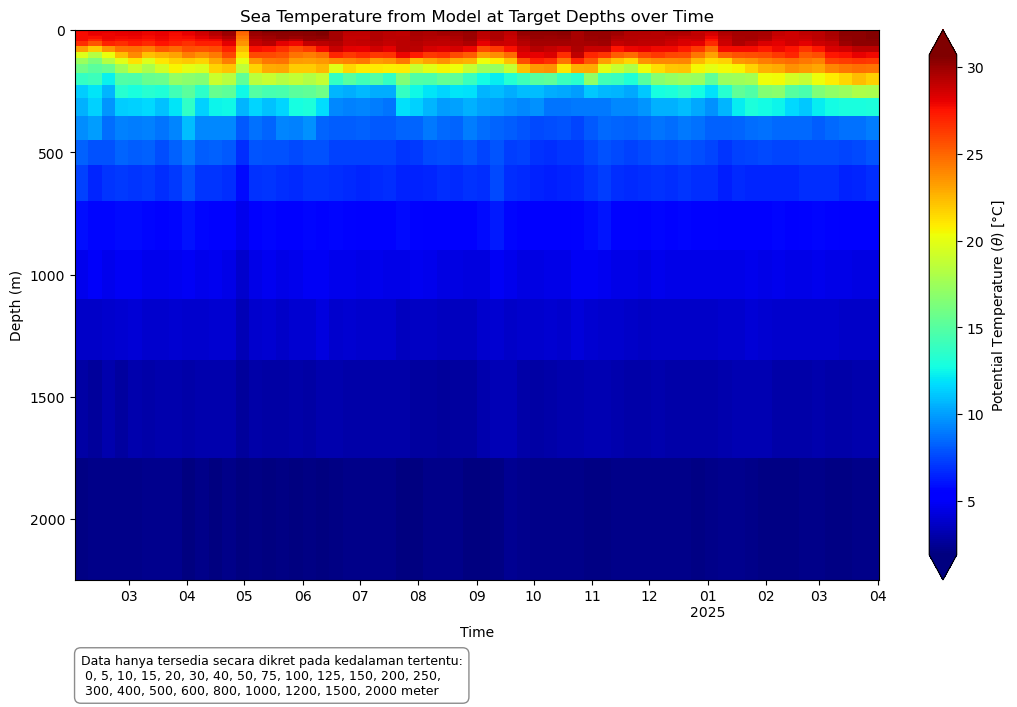

In [13]:
# Ambil data
df_temp_sorted = df_mod_temp.sort_index(ascending=True)

# Waktu dan kedalaman
times = pd.to_datetime(df_temp_sorted.columns.values)
depths = df_temp_sorted.index.values.astype(float)

# Konversi ke edge arrays
time_edges = mdates.date2num(times)
depth_edges = depths

# Tambah 1 nilai di ujung agar jumlah edge = jumlah data + 1
def get_edges(arr):
    delta = np.diff(arr) / 2
    edges = np.concatenate([[arr[0] - delta[0]], arr[:-1] + delta, [arr[-1] + delta[-1]]])
    return edges

time_edges = get_edges(time_edges)
depth_edges = get_edges(depths)

# Data suhu
temperature_2d = df_temp_sorted.values.astype(float)

# Plot
fig, ax = plt.subplots(figsize=(11, 11/(10/6)))
pcm = ax.pcolormesh(mdates.num2date(time_edges), depth_edges, temperature_2d, cmap='jet', shading='auto')
ax.invert_yaxis()

# Format dan label
plt.colorbar(pcm, label=r"Potential Temperature ($\theta$) [°C]", extend='both')
ax.set_xlabel("Time")
ax.set_ylabel("Depth (m)")
ax.set_title("Sea Temperature from Model at Target Depths over Time")

# Format sumbu waktu
def custom_date_formatter(x, pos):
    dt = mdates.num2date(x)
    return f"{dt:%m}\n{dt.year}" if dt.month == 1 else f"{dt:%m}"

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(plt.FuncFormatter(custom_date_formatter))
plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

# Teks penjelas di luar plot dengan kotak
depth_note = (
    "Data hanya tersedia secara dikret pada kedalaman tertentu:\n "
    "0, 5, 10, 15, 20, 30, 40, 50, 75, 100, 125, 150, 200, 250,\n "
    "300, 400, 500, 600, 800, 1000, 1200, 1500, 2000 meter"
)

fig.text(
    0.078, -0.06, depth_note,
    ha='left', fontsize=9, color='black',
    bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round,pad=0.5', alpha=0.9)
)

plt.tight_layout()
plt.show()

## Memetakan data drifter

### Memilih data berdasarkan ID dan data yang dibutuhkan

In [14]:
df_drifter2plot = df_drifter_adjs.loc[df_drifter_adjs['ID'] == 300234061473430][['ID', 'time', 'latitude', 'longitude', 'sst']]
df_drifter2plot.set_index(['time'], inplace=True)
df_drifter2plot

,ID,latitude,longitude,sst
time,,,,
2024-03-01 06:00:00,300234061473430,-14.068,144.960,30.078
2024-03-01 12:00:00,300234061473430,-14.008,144.871,29.994
2024-03-01 18:00:00,300234061473430,-13.956,144.759,29.961
2024-03-02 00:00:00,300234061473430,-13.861,144.574,29.993
2024-03-02 06:00:00,300234061473430,-13.826,144.387,30.085
2024-03-02 12:00:00,300234061473430,-13.755,144.309,30.052
2024-03-02 18:00:00,300234061473430,-13.658,144.208,29.968
2024-03-03 00:00:00,300234061473430,-13.620,144.121,30.277
2024-03-03 06:00:00,300234061473430,-13.631,144.069,30.201


### Menampilkan peta

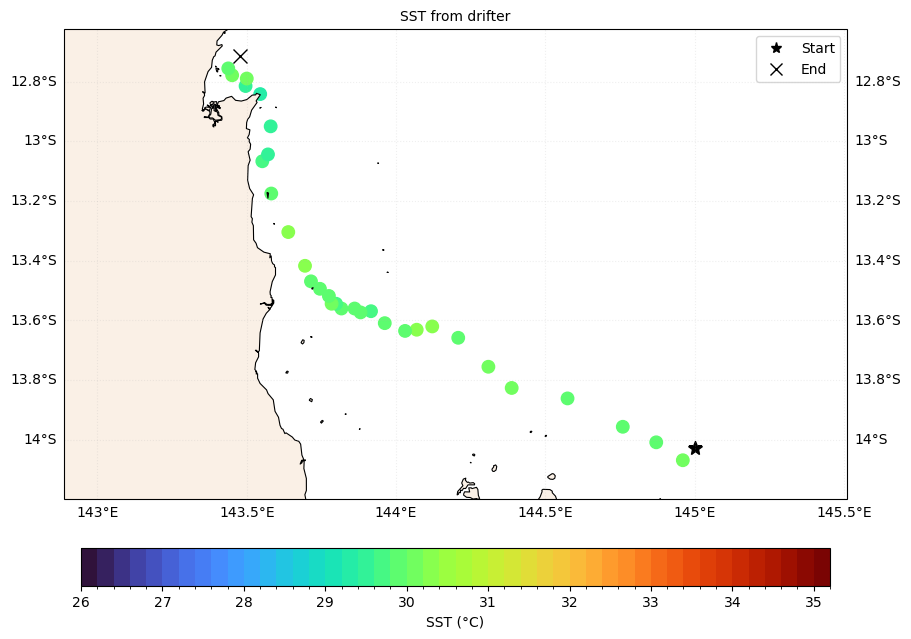

In [15]:
from mods import compute_extent

lons, lats = df_drifter2plot['longitude'].values, df_drifter2plot['latitude'].values
dts = pd.to_datetime(df_drifter2plot.index.values)
sst = df_drifter2plot['sst'].astype(float).values

# Final extent
exts = compute_extent(lons, lats)


# Basemap
proj = ccrs.PlateCarree()
rat=10/6
fig, ax = plt.subplots(figsize=(11, 11/rat), subplot_kw=dict(projection=proj))
ax.set_extent(exts, crs=proj)
ax.add_feature(cfeature.GSHHSFeature(scale="high", levels=[1, 2, 3, 4], facecolor="linen"), linewidth=.8)
ax.add_feature(cfeature.BORDERS, linestyle=":")


# Level SST
vmin, vmax, step = 26, 35, 0.2
levels = np.arange(vmin, vmax + step, step)

# Buat colormap dan norm untuk diskritisasi warna
cmap = cm.get_cmap('turbo', len(levels) - 1)  # colormap discrete
norm = matplotlib.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# Buat keterangan start dan end untuk rute drifter
ax.plot(lons[0]+.04, lats[0]+.04, marker='*', color='k', markersize=10, transform=proj, label='Start')
ax.plot(lons[-1]+.04, lats[-1]+.04, marker='x', color='k', markersize=10, transform=proj, label='End')

# Buat scatter plot
sctmod = ax.scatter(
    lons, lats, transform=proj, alpha=1.0, marker='o',
    c=sst, s=80, cmap=cmap, norm=norm
)

# Buat colorbar
cbar = plt.colorbar(sctmod, 
                    ax=ax, 
                    orientation='horizontal', 
                    shrink=0.7, 
                    pad=0.08, 
                    extend=None)
cbar.set_label("SST (°C)")


# Gridlines (Lintang-bujur)
gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=.2)
gl.top_labels = False
gl.left_labels = True
gl.right_labels = True
gl.bottom_labels = True

# Legenda
legend_elements = [
    Line2D([0], [0], lw=0, marker='*', color='k', label='Start', markersize=8),
    Line2D([0], [0], lw=0, marker='x', color='k', label='End', markersize=8)
]
ax.legend(handles=legend_elements, loc='upper right')

# Judul
ax.set_title('SST from drifter', fontsize=10)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()

### Plot data model

#### Ekstraksi data dan membuat dataframe

In [16]:
# Ekstrak Data model berdasarkan lat/lon/time data drifter
lons, lats = df_drifter2plot['longitude'].values, df_drifter2plot['latitude'].values
drf_time = pd.to_datetime(df_drifter2plot.index.values)

mod_temps_val = []
mod_tms = []

for i, dt in enumerate(drf_time):
    drfLat = lats[i]
    drfLon = lons[i]
    ds0 = ds_mod.sel(date=dt.strftime('%Y-%m-%d'), depth=0., lat=drfLat, lon=drfLon, method='nearest')
    mod_temps_val.append(ds0['sw_temp'].values)
    mod_tms.append(ds0.date.values)
    
# Buat dataframe untuk suhu pada kedalaman target dari data model
df_mod_temp = pd.DataFrame(
    data={
        'time': pd.to_datetime(mod_tms),
        'latitude': lats,
        'longitude': lons,
        'sst': mod_temps_val
    }
)
df_mod_temp.set_index(['time'], inplace=True)
df_mod_temp

,latitude,longitude,sst
time,,,
2024-03-01,-14.068,144.960,30.765625
2024-03-01,-14.008,144.871,30.679688
2024-03-01,-13.956,144.759,30.625
2024-03-02,-13.861,144.574,30.34375
2024-03-02,-13.826,144.387,30.429688
2024-03-02,-13.755,144.309,30.421875
2024-03-02,-13.658,144.208,30.304688
2024-03-03,-13.620,144.121,30.328125
2024-03-03,-13.631,144.069,30.359375


#### Plot data

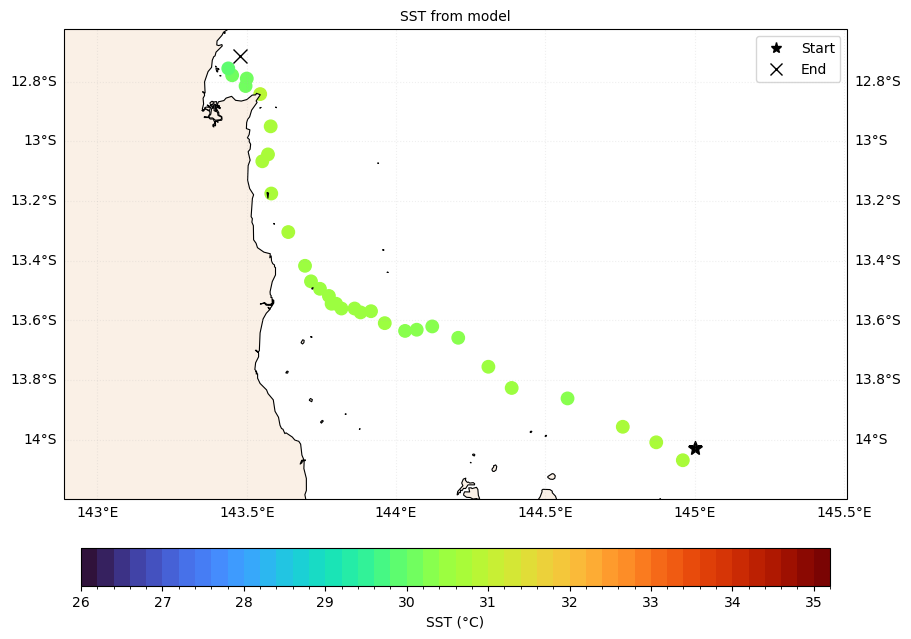

In [17]:
lons, lats = df_mod_temp['longitude'].values, df_mod_temp['latitude'].values
dts = pd.to_datetime(df_mod_temp.index.values)
sst = df_mod_temp['sst'].astype(float).values

# Final extent
exts = compute_extent(lons, lats)


# Basemap
proj = ccrs.PlateCarree()
rat=10/6
fig, ax = plt.subplots(figsize=(11, 11/rat), subplot_kw=dict(projection=proj))
ax.set_extent(exts, crs=proj)
ax.add_feature(cfeature.GSHHSFeature(scale="high", levels=[1, 2, 3, 4], facecolor="linen"), linewidth=.8)
ax.add_feature(cfeature.BORDERS, linestyle=":")


# Level SST
vmin, vmax, step = 26, 35, 0.2
levels = np.arange(vmin, vmax + step, step)

# Buat colormap dan norm untuk diskritisasi warna
cmap = cm.get_cmap('turbo', len(levels) - 1)  # colormap discrete
norm = matplotlib.colors.BoundaryNorm(boundaries=levels, ncolors=cmap.N)

# Buat keterangan start dan end untuk rute drifter
ax.plot(lons[0]+.04, lats[0]+.04, marker='*', color='k', markersize=10, transform=proj, label='Start')
ax.plot(lons[-1]+.04, lats[-1]+.04, marker='x', color='k', markersize=10, transform=proj, label='End')

# Buat scatter plot
sctmod = ax.scatter(
    lons, lats, transform=proj, alpha=1.0, marker='o',
    c=sst, s=80, cmap=cmap, norm=norm
)

# Buat colorbar
cbar = plt.colorbar(sctmod, 
                    ax=ax, 
                    orientation='horizontal', 
                    shrink=0.7, 
                    pad=0.08, 
                    extend=None)
cbar.set_label("SST (°C)")


# Gridlines (Lintang-bujur)
gl = ax.gridlines(draw_labels=True, linestyle=':', alpha=.2)
gl.top_labels = False
gl.left_labels = True
gl.right_labels = True
gl.bottom_labels = True

# Legenda
legend_elements = [
    Line2D([0], [0], lw=0, marker='*', color='k', label='Start', markersize=8),
    Line2D([0], [0], lw=0, marker='x', color='k', label='End', markersize=8)
]
ax.legend(handles=legend_elements, loc='upper right')

# Judul
ax.set_title('SST from model', fontsize=10)

# Menyesuaikan layout dan menampilkan plot
plt.tight_layout()
plt.show()